
# DEEP LEARNING PROJECT
###  Number recognition on MNIST dataset using keras.Sequential model and layers and Adam optimizer with high accuracy.

## Load Libraries

In [57]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

## Load training data

In [51]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


Let's look at some examples of the training data

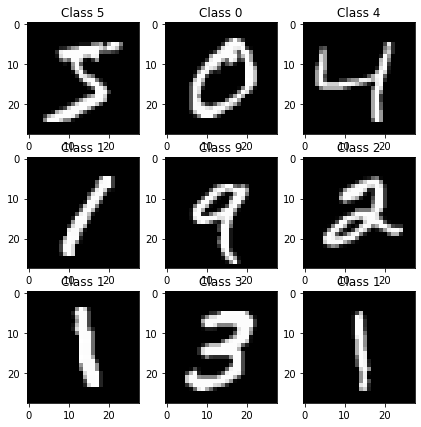

In [39]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training


In [52]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [53]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Build the neural network


In [42]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) 
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model!


In [44]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          verbose=1, validation_data=(X_test, Y_test))


Epoch 1/4
469/469 [==============================] - 9s 16ms/step - loss: 0.2472 - accuracy: 0.9258 - val_loss: 0.1191 - val_accuracy: 0.9627
Epoch 2/4
469/469 [==============================] - 7s 16ms/step - loss: 0.1015 - accuracy: 0.9685 - val_loss: 0.0804 - val_accuracy: 0.9739
Epoch 3/4
469/469 [==============================] - 7s 16ms/step - loss: 0.0696 - accuracy: 0.9779 - val_loss: 0.0651 - val_accuracy: 0.9807
Epoch 4/4
469/469 [==============================] - 8s 17ms/step - loss: 0.0539 - accuracy: 0.9823 - val_loss: 0.0688 - val_accuracy: 0.9787


## Finally, evaluate its performance

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06883667409420013
Test accuracy: 0.9786999821662903


In [48]:
# Assuming model is already trained and compiled
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


313/313 [==============================] - 1s 4ms/step


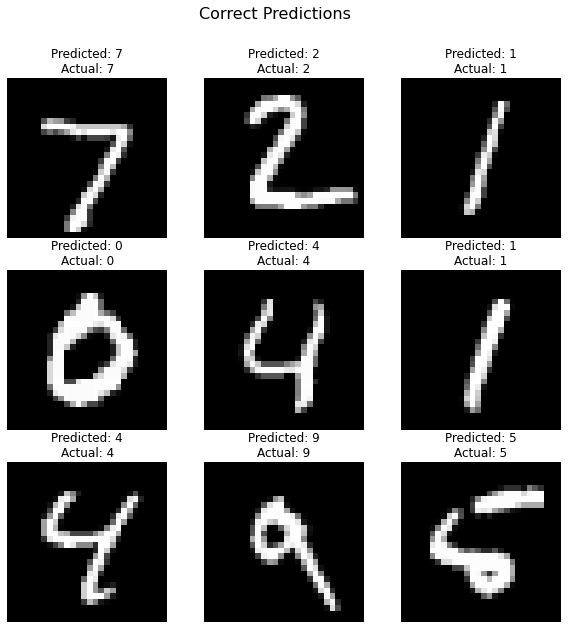

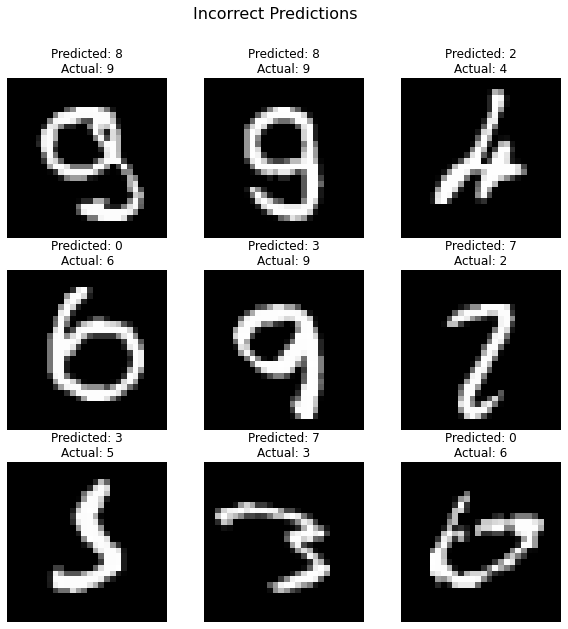

In [49]:
# Assuming 'correct_indices' and 'incorrect_indices' are defined
plt.figure(figsize=(10, 10))

# Plot correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\nActual: {}".format(predicted_classes[correct], y_test[correct]))
    plt.axis('off')

plt.suptitle('Correct Predictions', fontsize=16)
plt.show()

# Plot incorrect predictions
plt.figure(figsize=(10, 10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\nActual: {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.axis('off')

plt.suptitle('Incorrect Predictions', fontsize=16)
plt.show()
